In [1]:
 pip install tensorflow-gpu==2.0.0-alpha0

     |████████████████████████████████| 332.1MB 90kB/s 
     |████████████████████████████████| 419kB 41.5MB/s 
     |████████████████████████████████| 3.0MB 30.8MB/s 


In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image 
from IPython.display import clear_output

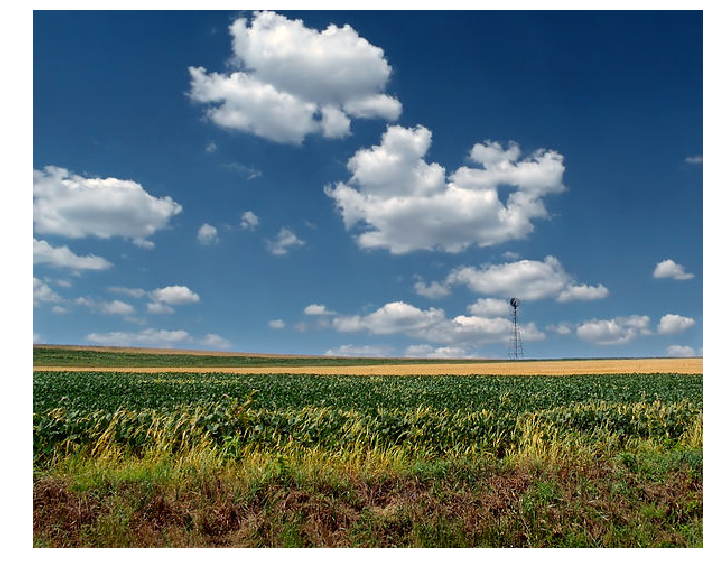

In [25]:
def  download(url):
  name=url.split("/")[-1]
  image_path=tf.keras.utils.get_file(name ,origin=url)
  img =image.load_img(image_path)
  return image.img_to_array(img)



def preprocess(img) :
  return (img / 127.5) - 1 


def deprocess(img):
  img=img.copy()
  img /= 2.0
  img +=0.5
  img *=255.0
  return np.clip(img,0,255.0).astype('uint8')



def show(img):
  plt.figure(figsize=(12,12))
  plt.grid(False)
  plt.axis('off')  
  plt.imshow(img)



url='https://storage.googleapis.com/applied-dl/clouds.jpg'
img=preprocess(download(url))
show(deprocess(img))

In [31]:
inception_v3=tf.keras.applications.InceptionV3(weights='imagenet',include_top=False)
inception_v3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, None, None, 3 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_470 (Bat (None, None, None, 3 96          conv2d_470[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, None, None, 3 0           batch_normalization_v1_470[0][0] 
_______________________________________________________________________________________

In [0]:
names =['mixed2','mixed3','mixed4','mixed5']
layers=[inception_v3.get_layer(name).output for name in names ]
feat_extraction_model = tf.keras.Model(inputs = inception_v3.input,outputs=layers)

In [0]:
def forward(img):
  img_batch=tf.expand_dims(img,axis=0)
  return feat_extraction_model(img_batch)

In [0]:
def calc_loss(layer_activations):
  totel_loss=0 
  for act in layer_activations:
    loss=tf.math.reduce_mean(act)
    totel_loss += loss

  return totel_loss  

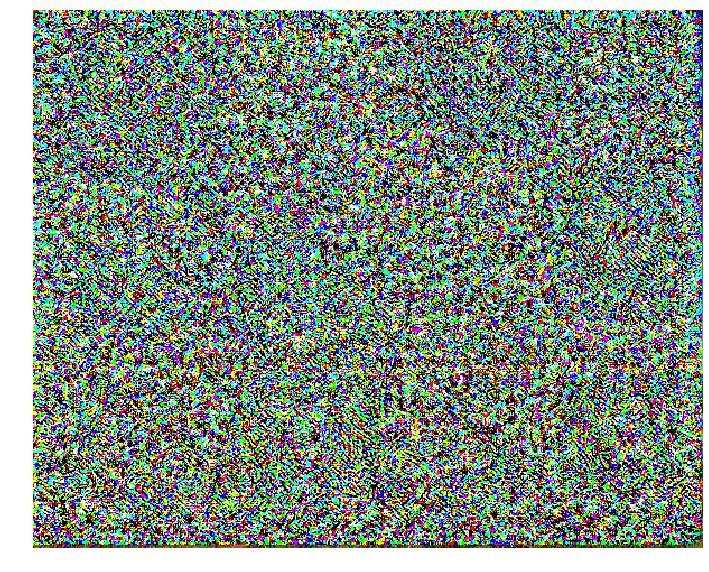

In [44]:
  img=tf.Variable(img)
  steps=400
  for step in range(steps):
    with tf.GradientTape() as tape:
      activations =forward(img)
      loss=calc_loss(activations)

    gradients= tape.gradient(loss,img)
    gradients /=gradients.numpy().std()+1e-8

    img.assign_add(gradients)

    if step % 100==0:
      clear_output()
      print("step %d ,loss %f" %(step,loss))
      show(deprocess(img.numpy()))
      plt.show()



clear_output()
show(deprocess(img.numpy()))